# Implementation of a hierarchical model

<hr>

In [1]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade colorcet bebi103 arviz cmdstanpy watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    import cmdstanpy; cmdstanpy.install_cmdstan()
else:
    data_path = "../data/"
# ------------------------------

/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])
/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray_r' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
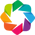

Loading BokehJS ...

In [2]:
import numpy as np

import cmdstanpy
import arviz as az

import bebi103

import iqplot

import bokeh
colors = bokeh.palettes.d3['Category10'][10]
bokeh.io.output_notebook()

<hr>

We will do MCMC on the hierarchical posterior for worm reversal data. As a reminder, the model is

\begin{align}
&\phi \sim \text{Beta}(1.1, 1.1), \\[1em]
&\kappa \sim \text{HalfNorm}(0, 10), \\[1em]
&\alpha = \phi \kappa, \\[1em]
&\beta = (1-\phi)\kappa,\\[1em]
&\theta_i \sim \text{Beta}(\alpha, \beta) \;\;\forall i,\\[1em]
&n_i \sim \text{Binom}(N_i, \theta_i)\;\;\forall i. 
\end{align}

To demonstrate how the hierarchical model works, we will consider the data sets from 2015, 2016, and 2017, and an additional three synthetic experiments that have 14/40, 5/34, and 110/660 reversals, respectively. These three experiments were not actually performed; I am using them here to demonstrate some effects we see in hierarchical models. In particular, the last experiment has many more trials and would dominate pooled data if we were not using a hierarchical model.

We will not perform prior predictive checks or other diagnostics, but simply demonstrate how a hierarchical model is built using Stan and investigate some of the resulting inferences.

In [3]:
# Data
n = np.array([9, 12, 18, 14, 5, 110])
N = np.array([35, 35, 54, 40, 34, 660])

Next, as usual, we define our model using Stan.

```stan
data {
  // Number of separate experiments
  int K;
  
  int N[K];
  int n[K];
}


parameters {
  // Hyperparameters
  real<lower=0, upper=1> phi;
  real<lower=0> kappa;

  // Parameters
  real<lower=0, upper=1> theta[K];
}


transformed parameters {
  // Transformed hyperparameters
  real<lower=0> alpha = phi * kappa;
  real<lower=0> beta_ = (1 - phi) * kappa;
}


model {
  // Hyperpriors
  phi ~ beta(1.1, 1.1);
  kappa ~ normal(0, 10.0);
  
  // Prior
  theta ~ beta(alpha, beta_);
  
  // Likelihood
  n ~ binomial(N, theta);
}
```

We can compile it and draw samples.

In [4]:
sm = cmdstanpy.CmdStanModel(stan_file='worm_hier.stan')

data = dict(K=len(n), n=n, N=N)

samples = sm.sample(data=data)
samples = az.from_cmdstanpy(posterior=samples)

bebi103.stan.check_all_diagnostics(samples)

INFO:cmdstanpy:compiling stan file /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/20/worm_hier.stan to exe file /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/20/worm_hier
INFO:cmdstanpy:compiled model executable: /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/20/worm_hier
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

0 of 4000 (0.0%) iterations ended with a divergence.

0 of 4000 (0.0%) iterations saturated the maximum tree depth of 10.

E-BFMI indicated no pathological behavior.


0

Now, let's look a corner plot to see how we did with the sampling.

In [5]:
g = bebi103.viz.corner(
    samples,
    parameters=["phi", "kappa", "theta[0]", "theta[1]", "theta[5]"],
    xtick_label_orientation=np.pi / 4,
)

bokeh.io.show(g)

We can see the results more clearly if we plot the marginalized distributions on top of each other. This also allows us to see how the respective experiments serve to determine $\phi$, the master reversal probability. I will also plot the most probable value of $\theta_i$ in the independent experiment model (i.e., all experiments are independent) as a diamond. We also plot the most probable reversal probability of the pooled model (all experiments pooled together) as a black diamond, again with a Uniform prior.

In [6]:
# Plot ECDF of phi samples
p = iqplot.ecdf(
    samples.posterior.phi.values.flatten(),
    frame_width=650,
    style="staircase",
    line_kwargs=dict(line_color="black"),
    y_axis_label="marginal posterior CDF",
    x_axis_label="parameter value",
    legend_label="ϕ",
)

# Plot the ECDFs for each theta_i
for i in range(len(n)):
    p = iqplot.ecdf(
        samples.posterior.theta.sel(theta_dim_0=i).values.flatten(),
        style="staircase",
        line_kwargs=dict(line_color=colors[i]),
        p=p,
        legend_label=f"θ{i}"
    )

# MAP of individuals (given by (n + α - 1) / (N + α + β - 2))
for i in range(len(n)):
    theta_map = (n[i] + 0.1) / (N[i] + 0.2)
    p.diamond(theta_map, 0.5, color=colors[i], size=20)

# Pooled MAP
theta_map = (n.sum() + 0.1) / (N.sum() + 0.2)
p.diamond(theta_map, 0.5, color="black", size=20)

p.legend.visible = True
p.legend.location = "bottom_right"
bokeh.io.show(p)

We see that the individual parameter values tend to "shrink" toward the hyperparameter value.  The hyperparameter value, in turn, is different than if we pooled all the data together. Notably, the black diamond, which represents the MAP estimate of the reversal probability if we pooled all of the data together, is significantly different than under the hierarchical model. This is because the data set with many more measurements overwhelms the other data sets if we pool the results.

We are probably most interested in the hyperparameter $\phi$, so let's compute its median and 80% credible interval.

In [7]:
print(
    """
ϕ = [{0:.3f}, {1:.3f}, {2:.3f}]
""".format(
        *np.percentile(samples.posterior.phi.values.flatten(), [10, 50, 90])
    )
)


ϕ = [0.213, 0.278, 0.352]



In [8]:
bebi103.stan.clean_cmdstan()

## Computing environment

In [9]:
%load_ext watermark
%watermark -v -p numpy,cmdstanpy,arviz,iqplot,bebi103,bokeh,jupyterlab

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy     : 1.20.3
cmdstanpy : 1.0.0
arviz     : 0.11.4
iqplot    : 0.2.4
bebi103   : 0.1.11
bokeh     : 2.3.3
jupyterlab: 3.2.1

